Attribute Information:

Car Name – Name of the car

Cyl – No of cylinders in the car – Multivalued discrete

Disp – Displacement – continuous

Hp – Horsepower – continuous

Wt – Weight – continuous

Acc – Accleration – continuous

Yr – Model of the car – Multivalued discrete

In [1]:
import pandas as pd
import numpy as np

In [2]:
car=pd.read_csv('cars-dataset.csv')

1. EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 2.5 points

In [3]:
car.shape

(398, 8)

In [4]:
car.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [5]:
car.describe().transpose()  

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


In [6]:
# hp column is missing this means it might have some suspicious values which might be non-numeric

In [7]:
car['hp']

0      130
1      165
2      150
3      150
4      140
5      198
6      220
7      215
8      225
9      190
10     170
11     160
12     150
13     225
14      95
15      95
16      97
17      85
18      88
19      46
20      87
21      90
22      95
23     113
24      90
25     215
26     200
27     210
28     193
29      88
      ... 
368     88
369     88
370     85
371     84
372     90
373     92
374      ?
375     74
376     68
377     68
378     63
379     70
380     88
381     75
382     70
383     67
384     67
385     67
386    110
387     85
388     92
389    112
390     96
391     84
392     90
393     86
394     52
395     84
396     79
397     82
Name: hp, Length: 398, dtype: object

In [8]:
# a ? value can be seen at index 374 . there is a scope that there might be more.


In [9]:
# Checking for more non- numeric values

In [10]:
non_numeric=pd.DataFrame(car.hp.str.isdigit()) # non numeric will have all the values denoted by boolean true for being numeric and for false for being non-numeric.

In [11]:
non_numeric

,hp
0,True
1,True
2,True
3,True
4,True
5,True
6,True
7,True
8,True
9,True


In [12]:
# false values are to be checked

In [13]:
non_numeric[non_numeric['hp'] == False]

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [14]:
# these are the 5 indices that have a non - numeric value

In [15]:
car = car.replace('?', np.nan)

In [16]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          392 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [17]:
# since the attribute hp is of object type 
car['hp'] = car['hp'].astype('float')

In [18]:
numeric_cols = car.drop('car name', axis=1) # getting the numerical columns

In [19]:
car_names = pd.DataFrame(car[['car name']]) #separating the car name column

In [20]:
numeric_cols = numeric_cols.apply(lambda x: x.fillna(x.median()),axis=0) # replacing the na values with median

In [21]:
car = numeric_cols.join(car_names)   # Recreating car by combining numerical columns with car names

In [22]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null float64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
car name    398 non-null object
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [23]:
car.describe().transpose()  

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


2. Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points

In [24]:
import seaborn as sns

D:\Python\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Python\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


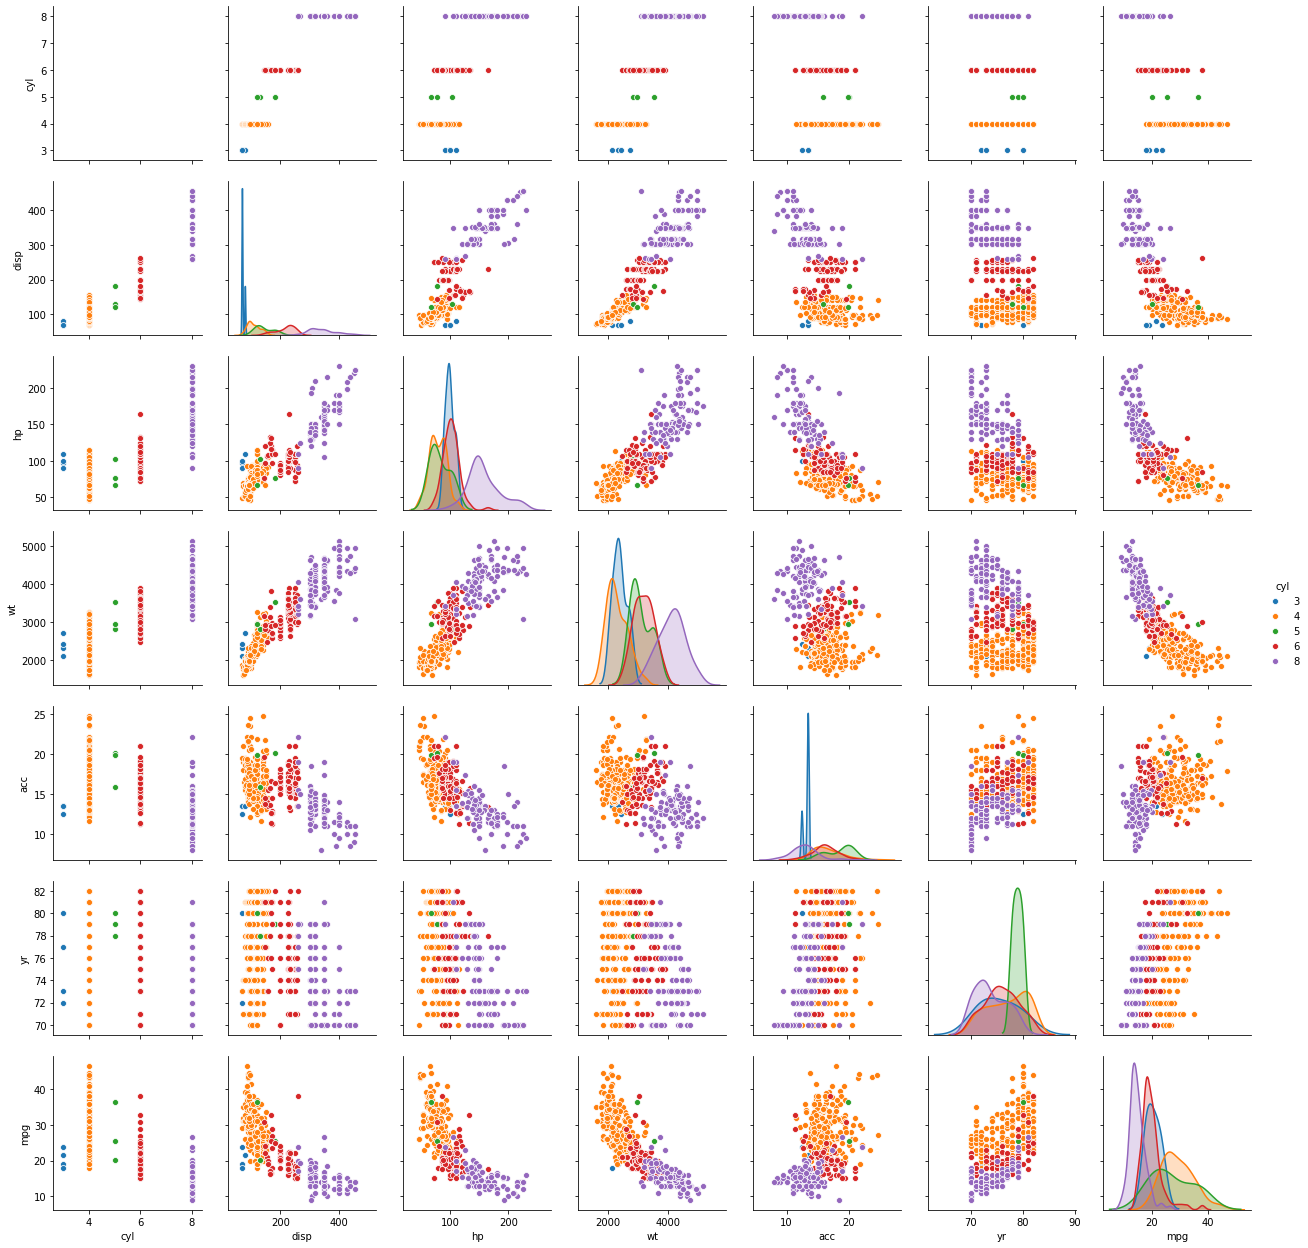

In [25]:
sns.pairplot(car, diag_kind='kde',hue='cyl')

In [ ]:
# The amount of Gaussian curves in the plot s give a visual identification of 5 different clusters existing in the dataset

In [ ]:
# So we can perform k mean clustering based on our pair panel visual inspection hence restricting range from 2 to 8

3. Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points)

In [ ]:
# Since the dimensions of the data are not known to , it would be wise to standardize the data using z scores before performing any clustering methods.

In [26]:
car_attr = car.loc[:,'cyl':'mpg'] # getting all the columns except car names

In [27]:
car_attr.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,8,307.0,130.0,3504,12.0,70,18.0
1,8,350.0,165.0,3693,11.5,70,15.0
2,8,318.0,150.0,3436,11.0,70,18.0
3,8,304.0,150.0,3433,12.0,70,16.0
4,8,302.0,140.0,3449,10.5,70,17.0


In [28]:
from scipy.stats import zscore
car_attr_z=car_attr.apply(zscore)

In [29]:
car_attr_z.pop('yr') # dropping year column

0     -1.627426
1     -1.627426
2     -1.627426
3     -1.627426
4     -1.627426
5     -1.627426
6     -1.627426
7     -1.627426
8     -1.627426
9     -1.627426
10    -1.627426
11    -1.627426
12    -1.627426
13    -1.627426
14    -1.627426
15    -1.627426
16    -1.627426
17    -1.627426
18    -1.627426
19    -1.627426
20    -1.627426
21    -1.627426
22    -1.627426
23    -1.627426
24    -1.627426
25    -1.627426
26    -1.627426
27    -1.627426
28    -1.627426
29    -1.356642
         ...   
368    1.621983
369    1.621983
370    1.621983
371    1.621983
372    1.621983
373    1.621983
374    1.621983
375    1.621983
376    1.621983
377    1.621983
378    1.621983
379    1.621983
380    1.621983
381    1.621983
382    1.621983
383    1.621983
384    1.621983
385    1.621983
386    1.621983
387    1.621983
388    1.621983
389    1.621983
390    1.621983
391    1.621983
392    1.621983
393    1.621983
394    1.621983
395    1.621983
396    1.621983
397    1.621983
Name: yr, Length: 398, d

In [30]:
car_attr_z

,cyl,disp,hp,wt,acc,mpg
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-0.706439
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.090751
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-0.706439
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-0.962647
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-0.834543
5,1.498191,2.262118,2.454408,1.620492,-2.021656,-1.090751
6,1.498191,2.502182,3.030708,1.635863,-2.384735,-1.218855
7,1.498191,2.367746,2.899730,1.586204,-2.566274,-1.218855
8,1.498191,2.511784,3.161685,1.719809,-2.021656,-1.218855
9,1.498191,1.887617,2.244844,1.039961,-2.566274,-1.090751


In [31]:
array1 = car_attr_z.values

In [32]:
# k means clustering
from sklearn.cluster import KMeans


In [33]:
cluster_range = range( 2, 8)   # from the pair panel visual inspection restricting range  from 2 to 8
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(car_attr)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,7.428941e+07
1,3,3.420799e+07
2,4,1.905160e+07
3,5,1.376961e+07
4,6,1.032131e+07
5,7,7.770900e+06


In [34]:
%matplotlib inline 
import matplotlib.pyplot as plt   


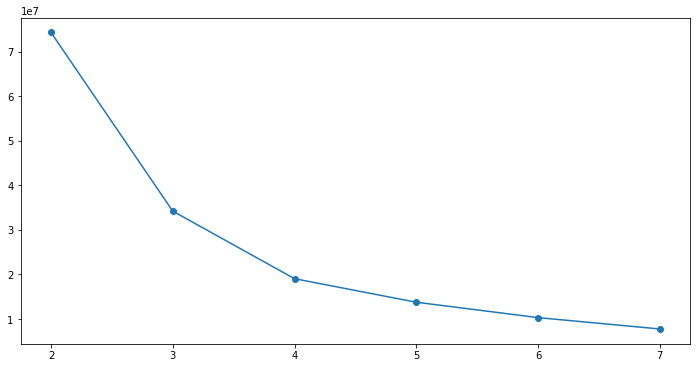

In [35]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [ ]:
# The elbow plot confirms our visual analysis that there are likely 3 good clusters
#The error from num_cluster 3 to num_cluster 4 is from 3.420799e+07 to  1.905160e+07 which shows 3 o might be the optimal value

In [36]:
cluster1 = KMeans( n_clusters = 3, random_state = 2354 )
cluster1.fit(car_attr_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2354, tol=0.0001, verbose=0)

In [37]:
centroids = cluster1.cluster_centers_
centroids

array([[ 1.4860546 ,  1.48450715,  1.50624078,  1.38753374, -1.06267868,
        -1.15110476],
       [-0.85347696, -0.80321374, -0.67506194, -0.78549879,  0.36133415,
         0.75394661],
       [ 0.34598334,  0.23689416, -0.06773972,  0.29795187,  0.30089004,
        -0.47244453]])

In [38]:
centroid_df = pd.DataFrame(centroids, columns = list(car_attr_z))
centroid_df

,cyl,disp,hp,wt,acc,mpg
0,1.486055,1.484507,1.506241,1.387534,-1.062679,-1.151105
1,-0.853477,-0.803214,-0.675062,-0.785499,0.361334,0.753947
2,0.345983,0.236894,-0.067740,0.297952,0.300890,-0.472445


In [39]:
prediction=cluster1.predict(car_attr_z)
car_attr_z["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC27E3F4E0>,
      dtype=object)

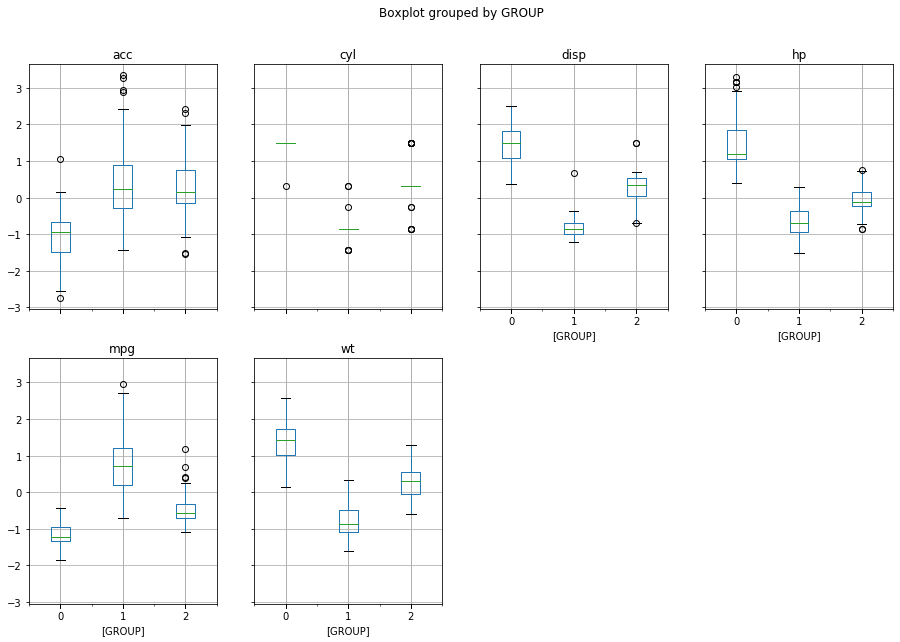

In [40]:
import matplotlib.pylab as plt
car_attr_z.boxplot(by = 'GROUP',  layout=(2,4), figsize=(15, 10))

In [41]:
car_attr_z

,cyl,disp,hp,wt,acc,mpg,GROUP
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-0.706439,0
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.090751,0
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-0.706439,0
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-0.962647,0
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-0.834543,0
5,1.498191,2.262118,2.454408,1.620492,-2.021656,-1.090751,0
6,1.498191,2.502182,3.030708,1.635863,-2.384735,-1.218855,0
7,1.498191,2.367746,2.899730,1.586204,-2.566274,-1.218855,0
8,1.498191,2.511784,3.161685,1.719809,-2.021656,-1.218855,0
9,1.498191,1.887617,2.244844,1.039961,-2.566274,-1.090751,0


In [42]:
grp1=pd.DataFrame((car_attr_z[car_attr_z['GROUP']==0]))

In [43]:
grp1

,cyl,disp,hp,wt,acc,mpg,GROUP
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-0.706439,0
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.090751,0
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-0.706439,0
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-0.962647,0
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-0.834543,0
5,1.498191,2.262118,2.454408,1.620492,-2.021656,-1.090751,0
6,1.498191,2.502182,3.030708,1.635863,-2.384735,-1.218855,0
7,1.498191,2.367746,2.899730,1.586204,-2.566274,-1.218855,0
8,1.498191,2.511784,3.161685,1.719809,-2.021656,-1.218855,0
9,1.498191,1.887617,2.244844,1.039961,-2.566274,-1.090751,0


In [44]:
grp2=pd.DataFrame((car_attr_z[car_attr_z['GROUP']==1]))

In [45]:
grp2

,cyl,disp,hp,wt,acc,mpg,GROUP
14,-0.856321,-0.772295,-0.243723,-0.707544,-0.206262,0.062185,1
18,-0.856321,-0.925936,-0.427091,-0.993671,-0.387801,0.446497,1
19,-0.856321,-0.925936,-1.527300,-1.342463,1.790672,0.318393,1
20,-0.856321,-0.801103,-0.453287,-0.352841,0.701436,0.190289,1
21,-0.856321,-0.829911,-0.374700,-0.638968,-0.387801,0.062185,1
22,-0.856321,-0.858718,-0.243723,-0.703997,0.701436,0.190289,1
23,-0.856321,-0.695475,0.227795,-0.870708,-1.113959,0.318393,1
29,-0.856321,-0.925936,-0.427091,-0.993671,-0.387801,0.446497,1
30,-0.856321,-0.513026,-0.374700,-0.835237,-0.024722,0.574601,1
31,-0.856321,-0.772295,-0.243723,-0.877802,-0.569341,0.190289,1


In [46]:
grp3=pd.DataFrame((car_attr_z[car_attr_z['GROUP']==2]))

In [47]:
grp3

,cyl,disp,hp,wt,acc,mpg,GROUP
15,0.320935,0.043923,-0.243723,-0.162483,-0.024722,-0.194023,2
16,0.320935,0.053526,-0.191332,-0.232242,-0.024722,-0.706439,2
17,0.320935,0.063128,-0.505677,-0.453340,0.156817,-0.322127,2
24,0.320935,0.053526,-0.374700,-0.381217,-0.206262,-0.322127,2
33,0.320935,0.370411,-0.112746,-0.397770,-0.932419,-0.578335,2
34,0.320935,0.303193,0.018232,0.554017,-0.024722,-0.962647,2
35,0.320935,0.543257,-0.112746,0.423960,-0.024722,-0.834543,2
36,0.320935,0.543257,-0.427091,0.392036,-0.024722,-0.578335,2
37,0.320935,0.370411,-0.112746,0.375483,-0.024722,-0.706439,2
45,0.320935,0.620078,0.149209,-0.009961,-0.750880,-0.706439,2


4. Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# applying linear regression on each cluster and printing the cofficients

In [49]:
X=grp1.drop(['mpg', 'GROUP'], axis = 1) 
y=grp1['mpg']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=9999)

In [51]:
regression_model_1 = LinearRegression()

regression_model_1.fit(X_train, y_train)

print(regression_model_1.score(X_train, y_train))
print(regression_model_1.score(X_test, y_test))


0.31222351797915726
0.4741956630844642


In [52]:
coeff1 = pd.DataFrame(regression_model_1.coef_,X.columns,columns=['Coefficient'])
coeff1

,Coefficient
cyl,-0.327223
disp,0.072689
hp,-0.151101
wt,-0.172786
acc,-0.041850


In [53]:
p=grp2.drop(['mpg', 'GROUP'], axis = 1)
q=grp2['mpg']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(p, q, test_size=0.30, random_state=1)

In [55]:
regression_model_2 = LinearRegression()

regression_model_2.fit(X_train, y_train)

print(regression_model_2.score(X_train, y_train))
print(regression_model_2.score(X_test, y_test))


0.4069369375896391
0.21169777242455545


In [56]:
coeff2 = pd.DataFrame(regression_model_2.coef_,X.columns,columns=['Coefficient'])
coeff2

,Coefficient
cyl,1.110159
disp,-0.162866
hp,-0.855753
wt,-0.410378
acc,-0.044164


In [57]:
m=grp3.drop(['mpg', 'GROUP'], axis = 1)
n=grp3['mpg']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(m, n, test_size=0.30, random_state=1)

In [59]:
regression_model_3 = LinearRegression()

regression_model_3.fit(X_train, y_train)

print(regression_model_3.score(X_train, y_train))
print(regression_model_3.score(X_test, y_test))


0.3514146822442489
0.012043404594117235


In [60]:
coeff3 = pd.DataFrame(regression_model_3.coef_,X.columns,columns=['Coefficient'])
coeff3

,Coefficient
cyl,0.389858
disp,-0.283425
hp,0.189930
wt,-0.431428
acc,0.005197


In [61]:
car_attr_z

,cyl,disp,hp,wt,acc,mpg,GROUP
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-0.706439,0
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.090751,0
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-0.706439,0
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-0.962647,0
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-0.834543,0
5,1.498191,2.262118,2.454408,1.620492,-2.021656,-1.090751,0
6,1.498191,2.502182,3.030708,1.635863,-2.384735,-1.218855,0
7,1.498191,2.367746,2.899730,1.586204,-2.566274,-1.218855,0
8,1.498191,2.511784,3.161685,1.719809,-2.021656,-1.218855,0
9,1.498191,1.887617,2.244844,1.039961,-2.566274,-1.090751,0


In [62]:
#applying linear regression on the whole dataset
w=car_attr_z.drop(['mpg', 'GROUP'], axis = 1)
e=car_attr_z['mpg']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(w, e, test_size=0.30, random_state=1)

In [64]:
regression_model_4 = LinearRegression()

regression_model_4.fit(X_train, y_train)

print(regression_model_4.score(X_train, y_train))
print(regression_model_4.score(X_test, y_test))


0.6872523551536476
0.7484948591982191
